# <h7>Author - Vaibhavi Deepak Gawas</h7><br>
# GRIP September 2021 - Sparks Foundation
# Technical Task 2- Prediction Using Unsupervised ML(Linear Regression)

In this task we will predict optimum number of cluster and represent it Visually.and for this we will use K-Means clustering Algorithm

Steps Performed are:<br>
1)Loading the Dataset<br>
2)Analyzing the data<br>
3)Visualizing the data<br>
4)Preparing The Data<br>
5)Model building and training<br> 
6)Prediction and Evaluation<br>


## 1. Loading Dataset



In [81]:
# Importing required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
# Loading data
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##2. Analyzing the Data

In [83]:
# Shape of Data
iris.shape

(150, 6)

In [84]:
# Features of Dataset
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [85]:
# Informatioon about Dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [86]:
# Desscription of Dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [87]:
# Finding null values 
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in our Dataset

In [88]:
# Finding correalation between the data
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## 3. Visualizing the Data

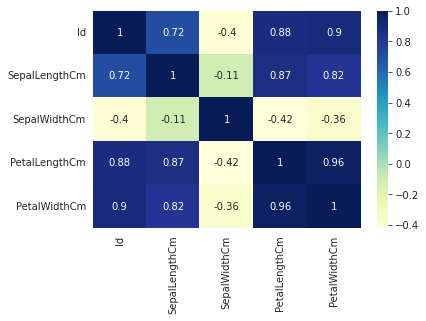

In [89]:
# Visualizing correlation between features
sns.heatmap(iris.corr(),annot = True,cmap='YlGnBu')

Text(0.5, 1.0, 'Species Data')

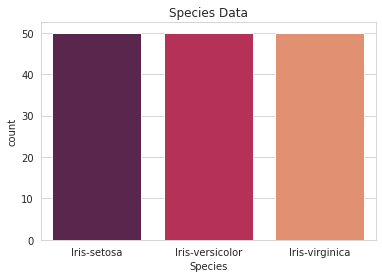

In [90]:
sns.countplot(x = "Species",data = iris,palette = 'rocket')
plt.title("Species Data")

Text(0.5, 1.0, 'SepalLength vs SepalWidth')

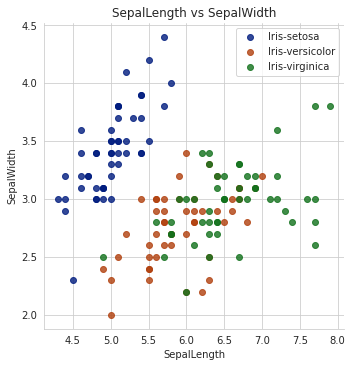

In [91]:
sns.set_style("whitegrid")
sns.lmplot(x = "SepalLengthCm",y = "SepalWidthCm",data = iris,hue = "Species",palette = "dark",fit_reg = False,legend=False)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend(loc="upper right")
plt.title("SepalLength vs SepalWidth")

Text(0.5, 1.0, 'PetalLength vs PetalWidth')

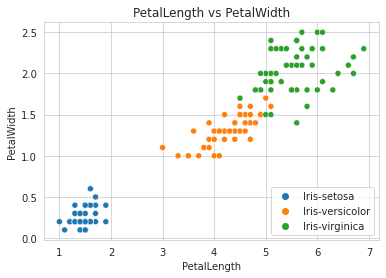

In [92]:
sns.set_style("whitegrid")
sns.scatterplot(x = "PetalLengthCm",y = "PetalWidthCm",hue = "Species",data=iris)
plt.xlabel("PetalLength")
plt.ylabel("PetalWidth")
plt.legend(loc="lower right")
plt.title("PetalLength vs PetalWidth")

##4. Finding Optimum number of cluster for K-Means (Using Elbow  Method) 

In [93]:
# Finding the optimum number of clusters for K-Means Classification

x = iris.iloc[:,[1,2,3,4]].values
               
from sklearn.cluster import KMeans
wcss = []
print(f"Sum of squared Error :")
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init="k-means++",max_iter=300,n_init=10,random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(f"wcss {i} : {kmeans.inertia_}")


Sum of squared Error :
wcss 1 : 680.8244
wcss 2 : 152.36870647733906
wcss 3 : 78.94084142614602
wcss 4 : 57.31787321428571
wcss 5 : 46.53558205128205
wcss 6 : 38.930963049671746
wcss 7 : 34.318753220611924
wcss 8 : 29.954086421037225
wcss 9 : 27.992635739389613
wcss 10 : 25.94725937001595


Text(0, 0.5, 'Sum of Squared Error')

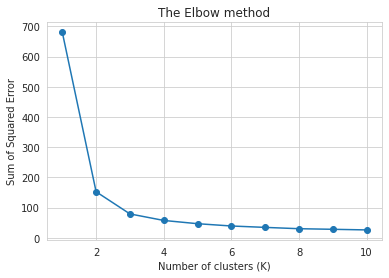

In [94]:
# Plotting result on graph to find elbow point
plt.plot(range(1,11),wcss,marker = "o")
plt.title("The Elbow method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of Squared Error")

From above graph we can clearly say that our elbow point is at k=3

## Model Building and Training

In [95]:
# as we have got elbow point 3 we will select k=3 to train the model

# creating k-means classifier
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=42,max_iter=300)

# Predicting output for each data point
y_pred = kmeans.fit_predict(x) 

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [96]:
# checking that which species are in which cluster
iris["cluster"] = y_pred
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [97]:
# Centroid of each cluster
centroid = kmeans.cluster_centers_
print(centroid)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


## Visualization of cluster

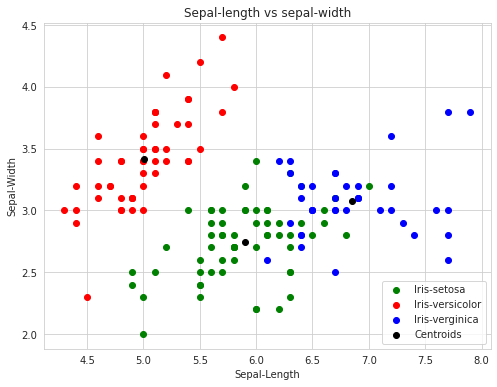

In [98]:
# visualizing cluster on sepal-width and sepal-length
plt.figure(figsize=(8,6))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],color = "green",label = "Iris-setosa")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],color = "red",label = "Iris-versicolor")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],color = "blue",label = "Iris-verginica")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "BLack",label = "Centroids")

plt.title("Sepal-length vs sepal-width")
plt.xlabel("Sepal-Length")
plt.ylabel("Sepal-Width")

plt.legend(loc = "lower right")

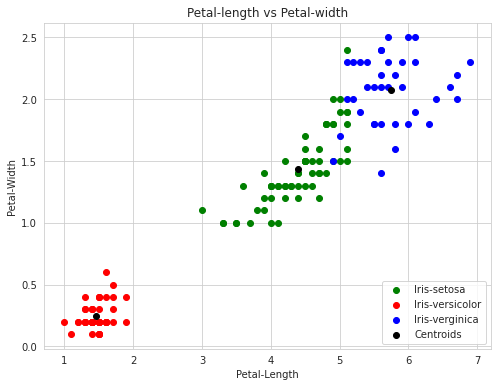

In [99]:
# visualizing cluster on Petal-width and petal-length
plt.figure(figsize=(8,6))

plt.scatter(x[y_pred==0,2],x[y_pred==0,3],color = "green",label = "Iris-setosa")
plt.scatter(x[y_pred==1,2],x[y_pred==1,3],color = "red",label = "Iris-versicolor")
plt.scatter(x[y_pred==2,2],x[y_pred==2,3],color = "blue",label = "Iris-verginica")

plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],color = "BLack",label = "Centroids")

plt.title("Petal-length vs Petal-width")
plt.xlabel("Petal-Length")
plt.ylabel("Petal-Width")

plt.legend(loc = "lower right")

## Conclusion
From this task we understood that how fast and efficiently Data points can be categorized into the group using K-Means algorithm even when very little information is available about data. 